# Analytical Benchmarks - 1D Polar 

In [2]:
#import and initialisation
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
init_printing()
%matplotlib inline

In [65]:
#define the symbols used in the derivation
r,rho,C1,Cr,gr,mu,tau,err,ethetatheta= symbols( 'r  rho C1 C_r g_r mu tau e_rr e_{thetatheta}')
vr = symbols('v_r',function=True)
p = symbols('p',function=True)

Firstly, we define the continuity (mass conservation) equation and the momentum equation in 1D, as well as the 1D stress tensor ($\tau$):

In [41]:
def get_continuity_equation(vr,rho):
    return 1/r*Derivative(rho*r*vr,r)

In [42]:
def get_tau_rr():
    return -2*mu*Derivative(vr,r) + mu*Derivative(r*vr,r)*Rational(2,3)/r

In [43]:
def get_tau_thetatheta():
    return -2*mu*vr/r + mu*Derivative(r*vr,r)*Rational(2,3)/r

In [44]:
def get_momentum_equation(p):
    return -Derivative(p,r) + rho*gr - (1/r*Derivative(r*tau_rr,r).doit() - tau_thetatheta/r )

Next we prescibe the density profile, and then get the continuity equation:

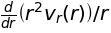

In [68]:
rho=r
continuity_equation = get_continuity_equation(vr(r),rho)
continuity_equation

(Note that equations in Sympy are implicitly equal to zero)

Then, we solve the continuity equation for the velocity:

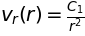

In [69]:
velocity_equation = dsolve(continuity_equation)
velocity_equation

Now assign this equation to a new value for $v_x$, and replace the placeholder constant $C1$ with the more informative $C_x$:

In [70]:
vr = velocity_equation.rhs
vr = vr.subs(C1,Cr)
vr

Next, we obtain the stress tensor $\tau$:

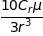

In [71]:
tau_rr=get_tau_rr()
tau_rr.doit()

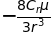

In [72]:
tau_thetatheta = get_tau_thetatheta()
tau_thetatheta.doit()

Then, we obtain the momentum equation:

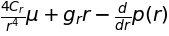

In [73]:
momentum_equation = get_momentum_equation(p(r)).doit()
momentum_equation

Next, we solve this differential equation to give us an equation for the pressure:

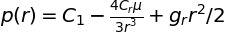

In [74]:
pressure_equation = dsolve(momentum_equation)
pressure_equation

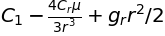

In [75]:
p = pressure_equation.rhs
p

We then perform two "sanity checks": we substitute the obtained equations into the continuity and momentum equations, which should then return zero:

In [76]:
get_momentum_equation(p).doit()

In [77]:
get_continuity_equation(vr,rho).doit()

Finally, we need to calculate the strain rate:

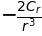

In [78]:
err = Derivative(vr,r).doit()
err

In [79]:
ethetatheta =vr/r
ethetatheta

This gives us the following final equations for the velocity and pressure:

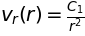

In [80]:
velocity_equation

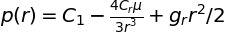

In [81]:
pressure_equation

# Plotting

Firstly, we need to generate functions from the above expressions for density, velocity and pressure:

In [82]:
density_function = lambdify(r,rho)

In [83]:
velocity_function = lambdify(r,vr.subs(Cr,1))

In [84]:
pressure_function = lambdify(r,p.subs(C1,0).subs(Cr,1).subs(gr,1).subs(mu,1))

In [85]:
err_function = lambdify(r,err.subs(Cr,1))

In [88]:
ett_function = lambdify(r,ethetatheta.subs(Cr,1))

Now we need an x range to plot over:


In [86]:
r_plotting = np.arange(1,4,0.01)

Finally, we plot the density, velocity and pressure profiles:

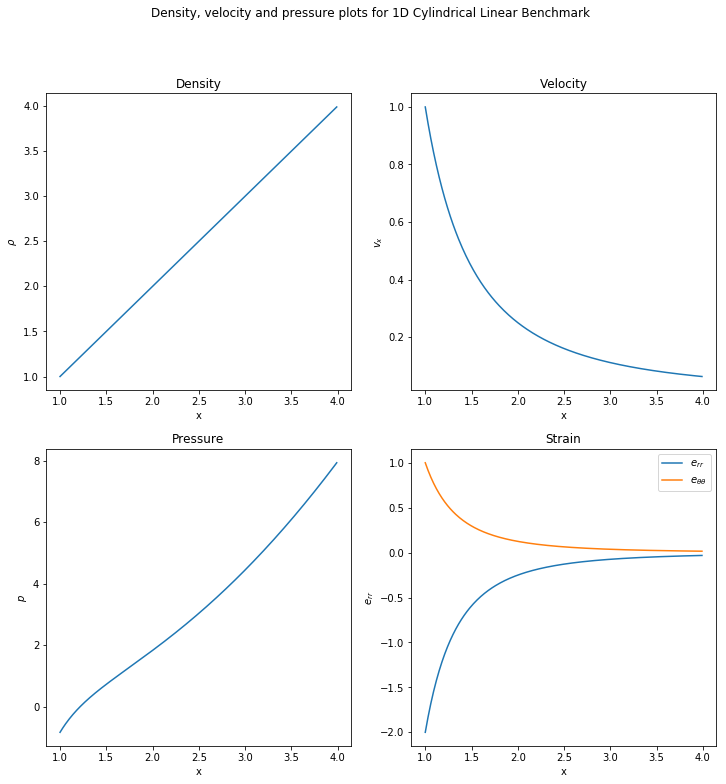

In [91]:
fig,axes = plt.subplots(2,2,figsize=(12,12))

axes[0,0].plot(r_plotting,density_function(r_plotting))
axes[0,0].set_xlabel("x")
axes[0,0].set_ylabel(r"$\rho$")
axes[0,0].set_title("Density")

axes[0,1].plot(r_plotting,velocity_function(r_plotting))
axes[0,1].set_xlabel("x")
axes[0,1].set_ylabel("$v_x$")
axes[0,1].set_title("Velocity")

axes[1,0].plot(r_plotting,pressure_function(r_plotting))
axes[1,0].set_xlabel("x")
axes[1,0].set_ylabel("$p$")
axes[1,0].set_title("Pressure")

axes[1,1].plot(r_plotting,err_function(r_plotting),label=r"$e_{rr}$")
axes[1,1].plot(r_plotting,ett_function(r_plotting),label=r"$e_{\theta\theta}$")
axes[1,1].legend()
axes[1,1].set_xlabel("x")
axes[1,1].set_ylabel("$e_{rr}$")
axes[1,1].set_title("Strain")


fig.suptitle("Density, velocity and pressure plots for 1D Cylindrical Linear Benchmark")

In [92]:
fig.savefig("1DCylindrical.png")